## Project 2 Linear Regression Home Price Prediction & Analysis

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score 
from sklearn.model_selection import train_test_split

## Load the given dataset

In [4]:
df=pd.read_csv('Project_2_Linear_Regression_Home.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.shape

(34857, 21)

## column names

In [6]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Describe the data

In [7]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## Basic data information 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# check the count of null values in dataset column

In [9]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## Drop columns 

In [ ]:
df=df.drop(['Address','Date','Postcode','YearBuilt','Lattitude','Longtitude'], axis=1)
df.head()

##  Fill Nan with mean in Landsize, BuildingArea column

In [11]:
for i in ('Landsize','BuildingArea'):
    df[i]=df[i].fillna(df[i].mean())
    
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,160.2564,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,160.2564,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0000,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,160.2564,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0000,Yarra City Council,Northern Metropolitan,4019.0


### Hear fill Nan values with 0 in Bedroom2, Bathroom, Car, Propertycount, Distance

In [12]:
for i in ('Bedroom2','Bathroom','Car','Propertycount','Distance'):
    df[i]=df[i].fillna(0)
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

### Now drop Nan values in data

In [13]:
df=df.dropna()

In [14]:
df.shape

(27244, 15)

In [15]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,160.2564,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0000,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0000,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,160.2564,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0000,Yarra City Council,Northern Metropolitan,4019.0


### Now there is clean data 

### so, we can go for data visulization

<AxesSubplot:ylabel='Frequency'>

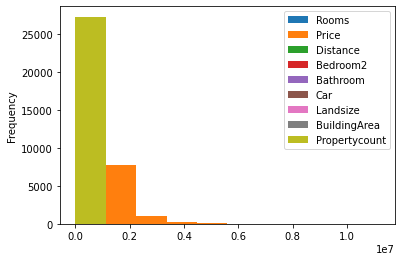

In [16]:
df.plot(kind='hist', x='Type')

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

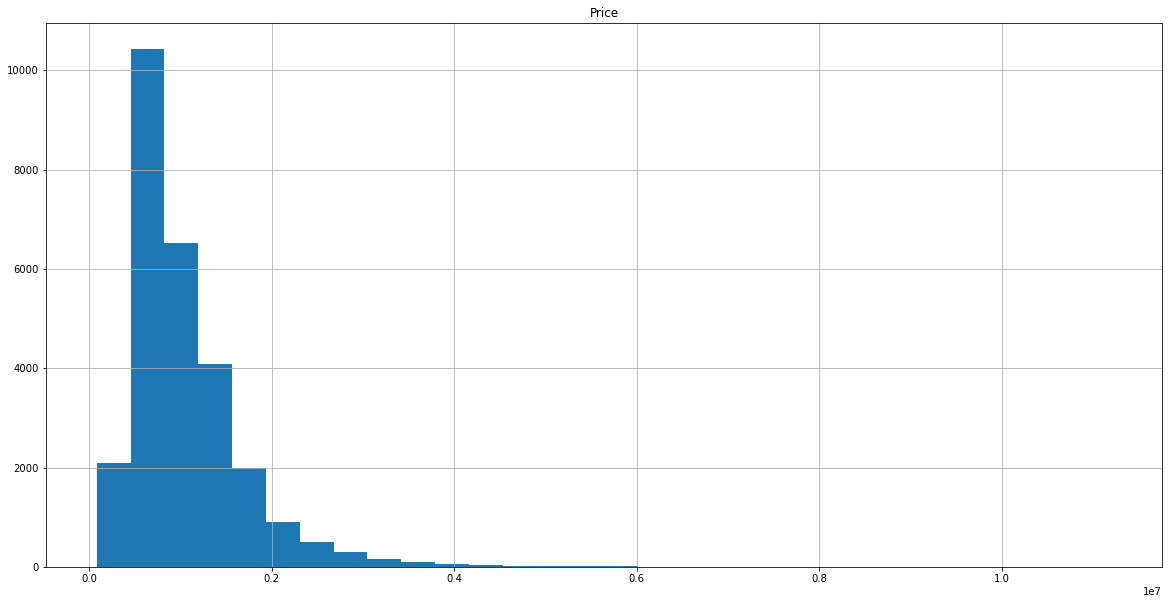

In [17]:
df.hist('Price', bins=30, figsize=(20,10))

array([[<AxesSubplot:title={'center':'Rooms'}>]], dtype=object)

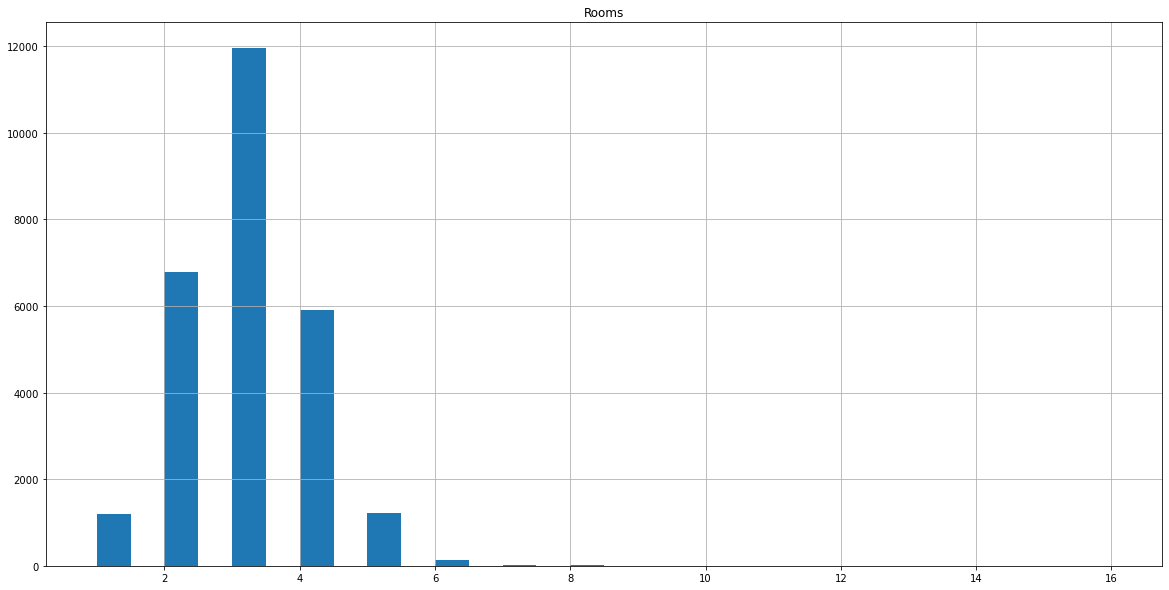

In [18]:
df.hist('Rooms', bins=30, figsize=(20,10))

array([<AxesSubplot:title={'center':'Bedroom2'}>], dtype=object)

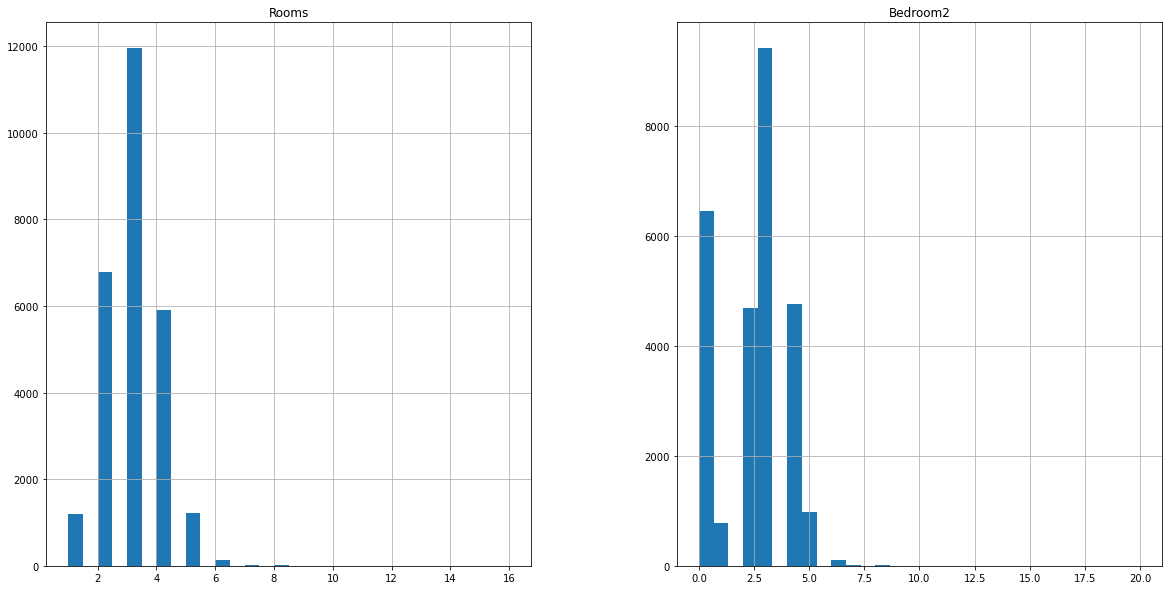

In [19]:
f, ax=plt.subplots(1,2, figsize=(20,10))
df.hist('Rooms', bins=30, figsize=(20,10),ax=ax[0])
df.hist('Bedroom2', bins=30, figsize=(20,10),ax=ax[1])

In [20]:
df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

<AxesSubplot:xlabel='Method'>

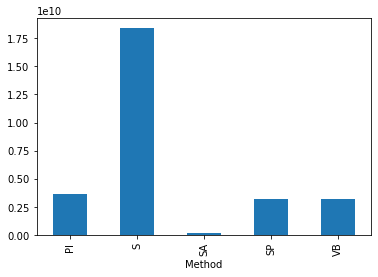

In [21]:
df.groupby(["Method"])["Price"].sum().plot(kind="bar")

###  One Hot Encoding 

In [22]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0


### create features

In [23]:
features=df.drop(['Price'], axis=1)
features.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0


### create target

In [24]:
target=df['Price']
target.head()

1    1480000.0
2    1035000.0
4    1465000.0
5     850000.0
6    1600000.0
Name: Price, dtype: float64

## Model - LinearRegression

In [25]:
model=LinearRegression()

In [26]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=13)

In [27]:
model.fit(features_train,target_train)

LinearRegression()

In [28]:
y_pre=model.predict(features_test)

In [29]:
# print('Slope:', model.coef_) 
print('Intercept:', model.intercept_) 
print('mean squared error: ', mean_squared_error(target_test,y_pre)) 
print('Root mean squared error: ', np.sqrt(mean_squared_error(target_test,y_pre)))
print('R2 score: ', r2_score(target_test,y_pre)) 

Intercept: 778375.053369727
mean squared error:  151956477902.48657
Root mean squared error:  389815.953883992
R2 score:  0.6411501606912242


## Apply all Models

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [33]:
models={'lr':LinearRegression(),
        'ls':Lasso(),
        'rg':Ridge(),
        'dt':DecisionTreeRegressor(),
        'rf':RandomForestRegressor(),
        'gb':GradientBoostingRegressor(),
        'ad':AdaBoostRegressor(),
        'knn':KNeighborsRegressor(),
        'svm':SVR(),
        'nb':GaussianNB(),
       }

In [35]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f'{name} Mean squared error:  {mean_squared_error(target_test,y_pred)}') 
    print(f'{name} R2 score: {r2_score(target_test,y_pred)}\n')

lr Mean squared error:  151956477902.48657
lr R2 score:, 0.6411501606912242

ls Mean squared error:  151333826302.16727
ls R2 score:, 0.6426205713627806

rg Mean squared error:  147895057230.19876
rg R2 score:, 0.6507413290029238

dt Mean squared error:  162903247456.82782
dt R2 score:, 0.6152990318038702

rf Mean squared error:  97049347228.11787
rf R2 score:, 0.7708150179673137

gb Mean squared error:  118660224066.17233
gb R2 score:, 0.7197802757325393

ad Mean squared error:  787964324438.4924
ad R2 score:, -0.8608016920953787

knn Mean squared error:  196318556025.68686
knn R2 score:, 0.5363877653945294

svm Mean squared error:  452466559394.11926
svm R2 score:, -0.06851352684923873

nb Mean squared error:  463336108902.5208
nb R2 score:, -0.09418229825200664



## RandomForestRegressor  which shows best accuracy - nearly 77%